In [4]:
import pandas as pd
df = pd.read_csv('/content/loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [5]:
df.isnull().sum()


,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [6]:
df['person_gender'] = df['person_gender'].str.strip().str.lower()
df['person_education'] = df['person_education'].str.strip().str.title()
df['person_home_ownership'] = df['person_home_ownership'].str.strip().str.upper()
df['loan_intent'] = df['loan_intent'].str.strip().str.upper()
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].str.strip().str.upper()


In [4]:


# 2. Class balance in target variable
print("\nLoan Status Counts:\n", df['loan_status'].value_counts())

# 3. Summary statistics
print("\nSummary Statistics:\n", df.describe(include='all'))




Loan Status Counts:
 loan_status
0    35000
1    10000
Name: count, dtype: int64

Summary Statistics:
           person_age person_gender person_education  person_income  \
count   45000.000000         45000            45000   4.500000e+04   
unique           NaN             2                5            NaN   
top              NaN          male         Bachelor            NaN   
freq             NaN         24841            13399            NaN   
mean       27.764178           NaN              NaN   8.031905e+04   
std         6.045108           NaN              NaN   8.042250e+04   
min        20.000000           NaN              NaN   8.000000e+03   
25%        24.000000           NaN              NaN   4.720400e+04   
50%        26.000000           NaN              NaN   6.704800e+04   
75%        30.000000           NaN              NaN   9.578925e+04   
max       144.000000           NaN              NaN   7.200766e+06   

        person_emp_exp person_home_ownership     loan_a

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [8]:

corr = df.select_dtypes(include=['int64', 'float64']).corr()
corr

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432,-0.021476
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919,-0.135808
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.020481
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,0.107714
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,0.332005
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,0.384880
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.014851
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.007647
loan_status,-0.021476,-0.135808,-0.020481,0.107714,0.332005,0.384880,-0.014851,-0.007647,1.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

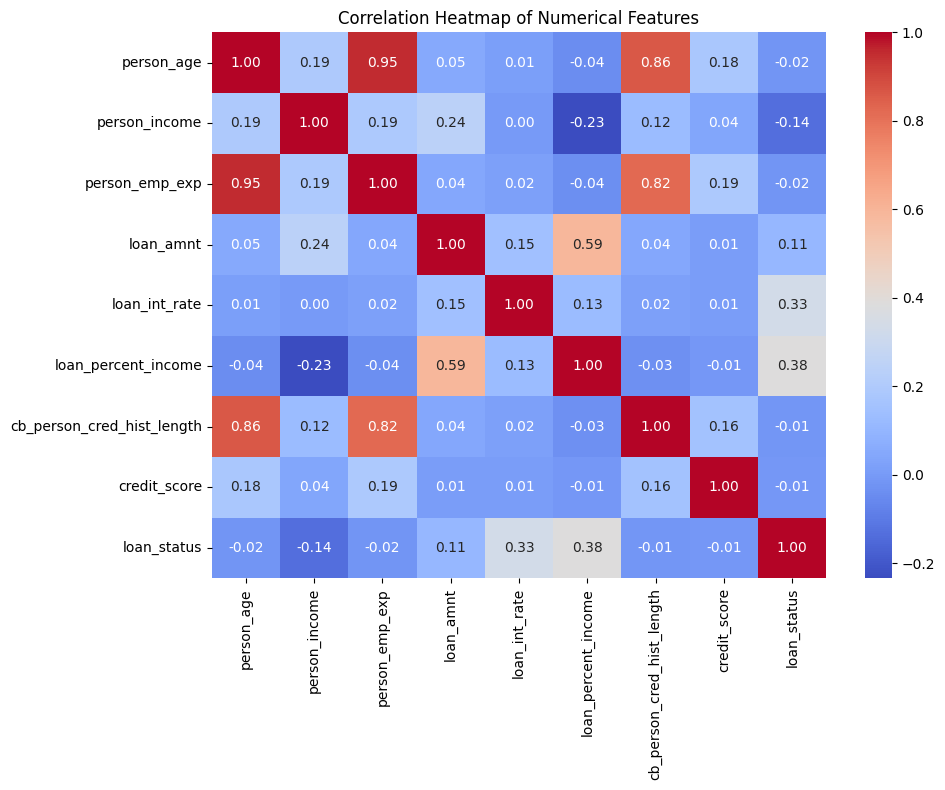

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

In [11]:
df.drop("loan_percent_income",axis=1,inplace=True)

<Axes: xlabel='person_gender', ylabel='count'>

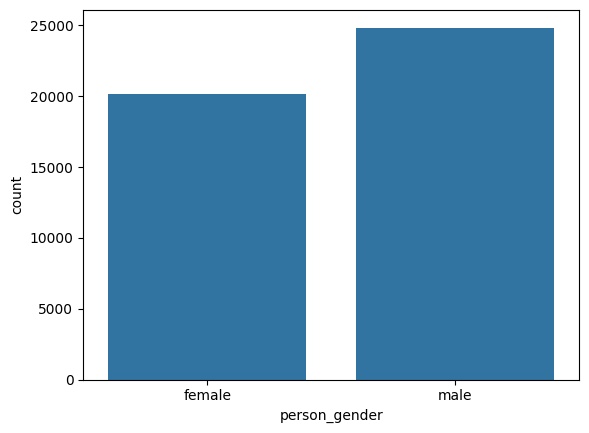

In [12]:
sns.countplot(x='person_gender', data=df)


<Axes: ylabel='count'>

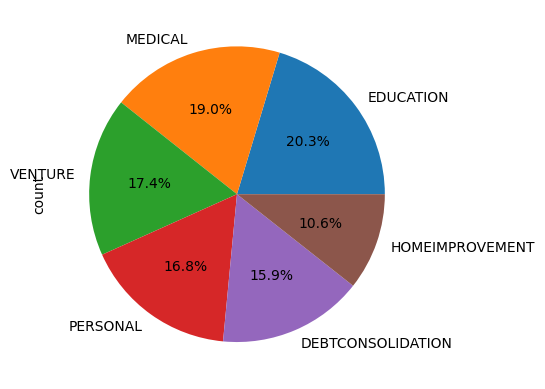

In [13]:
df['loan_intent'].value_counts().plot.pie(autopct='%1.1f%%')


<Axes: xlabel='person_gender'>

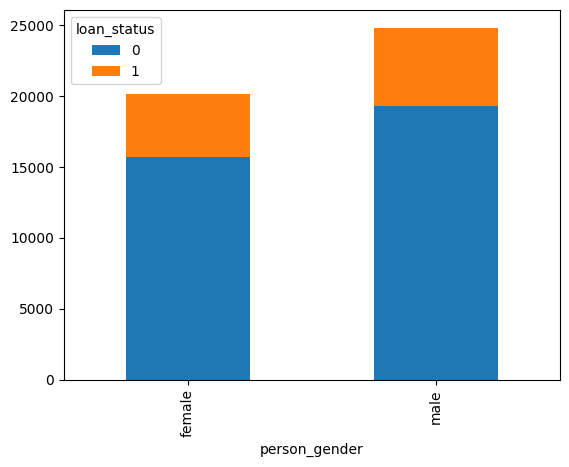

In [14]:
pd.crosstab(df['person_gender'], df['loan_status']).plot(kind='bar', stacked=True)


<Axes: xlabel='loan_intent', ylabel='loan_amnt'>

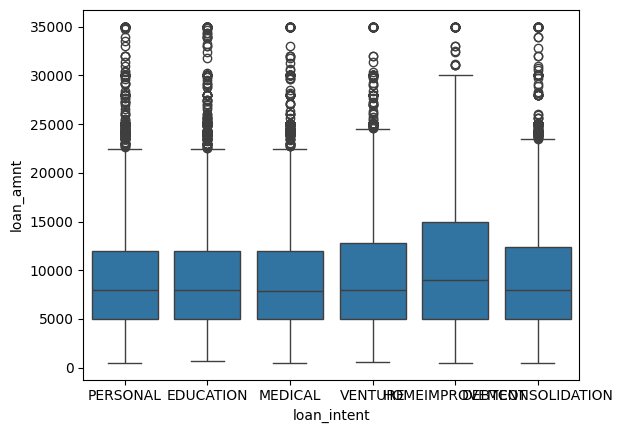

In [15]:
sns.boxplot(x='loan_intent', y='loan_amnt', data=df)


<Axes: xlabel='loan_status', ylabel='person_gender'>

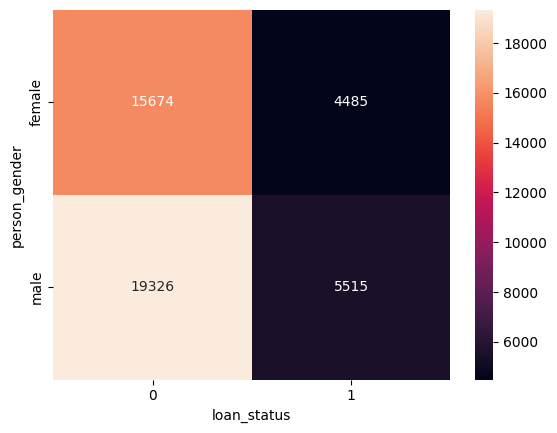

In [16]:
sns.heatmap(pd.crosstab(df['person_gender'], df['loan_status']), annot=True, fmt="d")


In [17]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers, lower, upper


In [18]:
def cap_outliers(df, column):
    _, lower, upper = detect_outliers_iqr(df, column)
    df[column] = df[column].clip(lower=lower, upper=upper)


In [19]:
columns_to_check = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate',
                    'credit_score', 'cb_person_cred_hist_length']

for col in columns_to_check:
    cap_outliers(df, col)


In [20]:
from scipy.stats import zscore

def remove_outliers_zscore(df, column, threshold=3):
    z_scores = zscore(df[column])
    return df[(abs(z_scores) < threshold)]
for col in ['person_income', 'loan_amnt', 'loan_int_rate']:
    df = remove_outliers_zscore(df, col)


In [21]:
from scipy.stats import ttest_ind

approved = df[df['loan_status'] == 1]['person_income']
rejected = df[df['loan_status'] == 0]['person_income']

t_stat, p = ttest_ind(approved, rejected, equal_var=False)  # Welch's t-test

print("T-statistic:", t_stat)
print("p-value:", p)

if p < 0.05:
    print("Reject H₀ — Income differs between approval groups.")
else:
    print("Fail to reject H₀ — No significant difference in income.")


T-statistic: -59.49253825253993
p-value: 0.0
Reject H₀ — Income differs between approval groups.


In [22]:
from scipy.stats import chi2_contingency

# Contingency table
edu_vs_status = pd.crosstab(df['person_education'], df['loan_status'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(edu_vs_status)

print("Chi-square statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("Reject H₀ — Education and loan status are related.")
else:
    print("Fail to reject H₀ — No evidence that education affects loan status.")


Chi-square statistic: 2.0159398837088074
p-value: 0.732826935503778
Fail to reject H₀ — No evidence that education affects loan status.


In [23]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

# Split columns
standard_cols = ['person_age', 'loan_int_rate', 'credit_score', 'cb_person_cred_hist_length']
robust_cols = ['person_income', 'loan_amnt']

scaler = ColumnTransformer([
    ('std', StandardScaler(), standard_cols),
    ('rob', RobustScaler(), robust_cols)
])


In [ ]:
scaler

ColumnTransformer(transformers=[('std', StandardScaler(),
                                 ['person_age', 'loan_int_rate', 'credit_score',
                                  'cb_person_cred_hist_length']),
                                ('rob', RobustScaler(),
                                 ['person_income', 'loan_amnt'])])

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
df = pd.read_csv("/content/loan_data.csv")

# Separate features and target
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Label encode categorical features
cat_cols = X.select_dtypes(include=["object"]).columns
for col in cat_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
preds = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))


Accuracy: 0.9286666666666666
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.89      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000

